In [8]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
from data_utils import trim_intervals, get_data
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
import GAN

In [9]:
def load_data(train_size, test_size):                                              
    keep_channels=['C3']                                                           
    trial_len = 1.5                                                                
                                                                                   
    # X, y = get_data("../data/CLASubjectA1601083StLRHand.mat", trial_len, keep_channels)
    X, y = get_data("../data/CLASubjectB1512153StLRHand.mat", trial_len, keep_channels)
                                                                                   
    X = X[y != 3]                                                                  
    y = y[y != 3]                                                                  
    # 0 is left hand                                                               
    y[y == 1] = 0                                                                  
    # 1 is right hand                                                              
    y[y == 2] = 1                                                                  
    interval_len = .45                                                             
    X = trim_intervals(X, .15, interval_len)                                       
                                                                                   
    num_channels= len(keep_channels)                                               
    d2 = np.ceil(num_channels * interval_len / 0.005).astype(int)                  
    X = X.reshape(642, d2)                                                         
                                                                                   
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size)
                                                                                   
    return X_train, X_test, y_train, y_test

In [10]:
def shuffle(X, y):                                                              
    shape = X.shape[0]                                                          
    data = np.c_[X, y]                                                          
                                                                                
    np.random.shuffle(data)                                                     
                                                                                
    return data[:shape], data[-1]  

In [11]:
def train_GAN(X_train, y_train):                                                
        gan = GAN.GAN((X_train, y_train), g_in=X_train.shape[1], g_hid=100, g_out=X_train.shape[1],
                       d_in=X_train.shape[1], d_hid=10, d_out=1)  
        gan.train(10000)                                                         
        return gan.generate_data(100).reshape((100,90))                         
                                                                                
                                                                                
def experiment():                                                               
    # do we really need the labels in the GAN? It never looks at them           
#     sizes = [.9 , .8, .7, .6, .5, .4, .3]
    sizes = [.99]
    for s in sizes:
        print("train size is {}".format(s))
        X, _, y, _ = load_data(s, 1.0-s)                                            
        left_X, left_y = X[y == 0], y[y == 0]                                       
        right_X, right_y = X[y == 1], y[y == 1]  
        print("left")
        train_GAN(left_X, left_y)
        print("right")
        train_GAN(right_X, right_y)

train size is 0.99
left


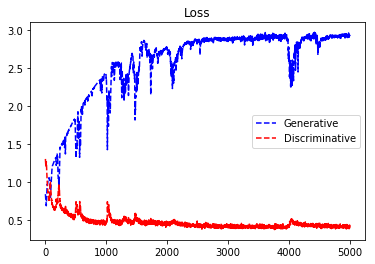

right


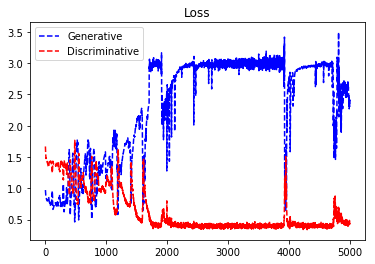

In [5]:
# with three? layer fc, leaky relu,
# d_hid=3
# g_hid=50

train size is 0.99
left


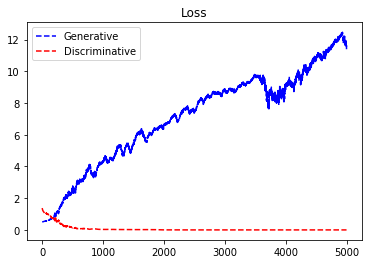

right


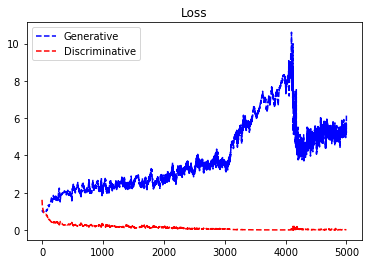

train size is 0.99
left


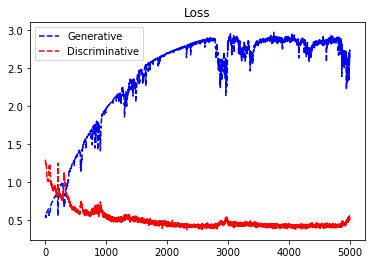

right


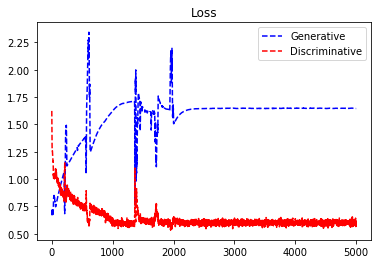

In [6]:
# with four layer fc, leaky relu,
# d_hid=3
# g_hid=50

train size is 0.99
left


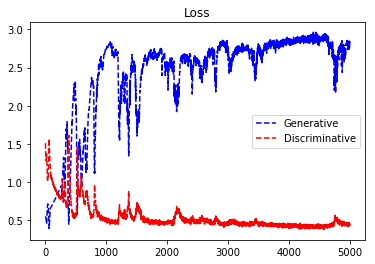

right


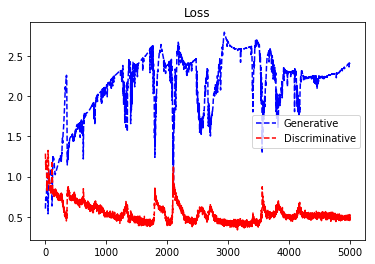

In [12]:
# with four layer fc, leaky relu
# 0.6 dropout for discriminator
# d_hid=3
# g_hid=50

train size is 0.99
left


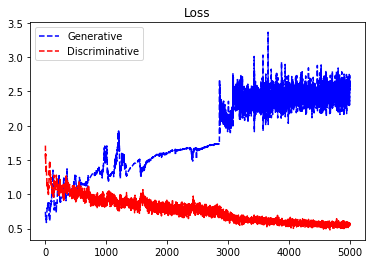

right


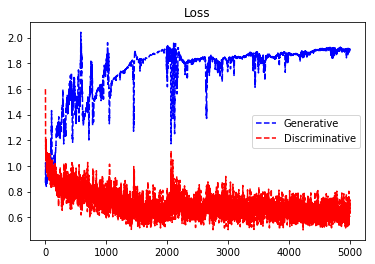

In [5]:
# with four layer fc, leaky relu
# 0.6 dropout for discriminator
# d_hid=10
# g_hid=50

train size is 0.99
left


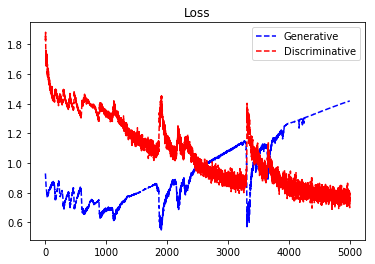

right


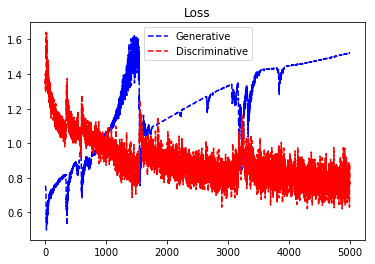

In [5]:
# with four layer fc, leaky relu
# 0.6 dropout for discriminator
# d_hid=10
# g_hid=50
# d uses SGD
# g uses Adam

train size is 0.99
left


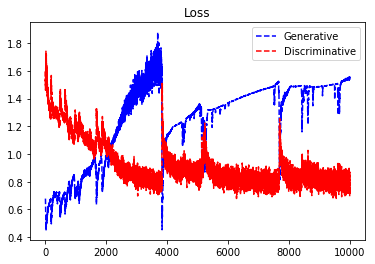

right


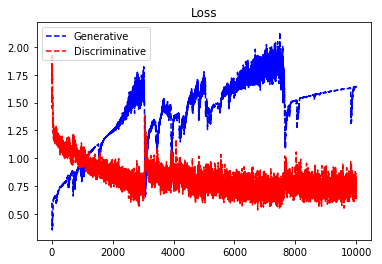

In [7]:
# with four layer fc, leaky relu
# 0.6 dropout for discriminator
# d_hid=10
# g_hid=50
# d uses SGD
# g uses Adam
# 10000 epochs

In [ ]:
# with four layer fc, leaky relu
# 0.6 dropout for discriminator
# d_hid=10
# g_hid=200
# d uses SGD
# g uses Adam
# 10000 epochs

train size is 0.99
left


In [ ]:
experiment()
# with four layer fc, leaky relu -- generator
# 0.6 dropout for discriminator(after layer 1 and 2), 3 layers total 
# d_hid=10
# g_hid=200
# d uses SGD
# g uses Adam
# 10000 epochs